In [37]:
import healpy as hp
import os
import pymaster as nmt

In [28]:
mpath = "/project/projectdirs/litebird/simulations/maps/lensing_project_paper"

In [29]:
mask64 = hp.read_map("mask_for_Toshiya.fits")

In [40]:
import numpy as np
len(mask64[mask64==0])/len(mask64)

0.5099080403645834

In [41]:
len(mask_binary[mask_binary==0])/len(mask_binary)

0.5099080403645834

In [30]:
nside = 2048

In [31]:
mask_binary = hp.ud_grade(mask64, nside)

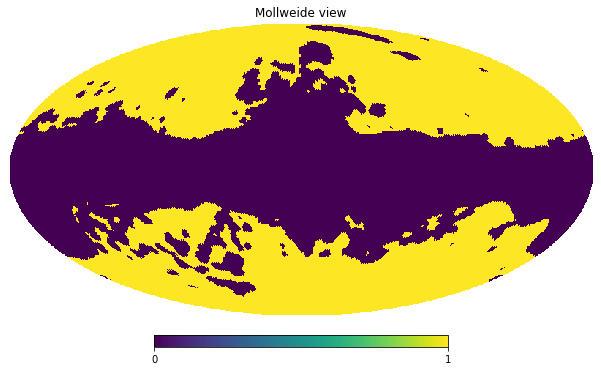

In [32]:
hp.mollview(mask_binary)

In [33]:
methods = ['Smooth','C1']

In [34]:
Mpath =  os.path.join(mpath,"Masks")
os.makedirs(Mpath,exist_ok=True)

In [35]:
fname = f"LB_Nside{nside}_binary.fits.gz"
hp.write_map(os.path.join(Mpath,fname), mask_binary)

setting the output map dtype to [dtype('float32')]


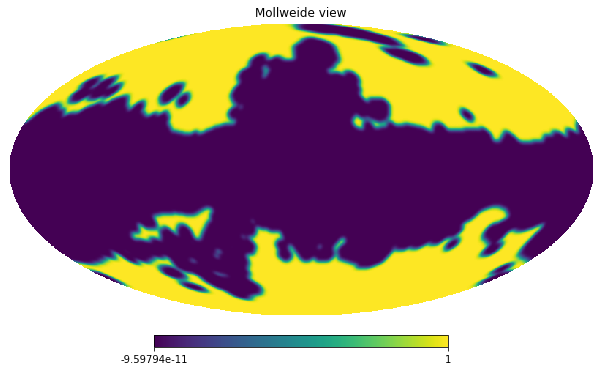

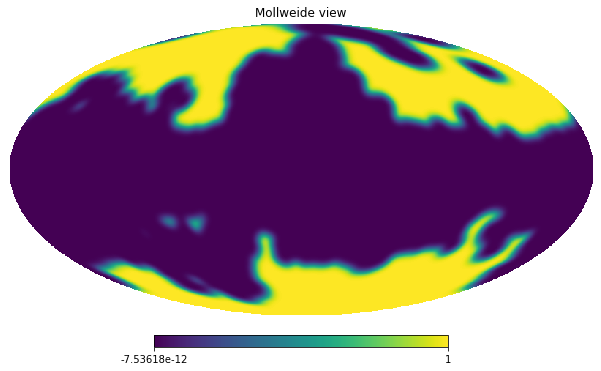

In [38]:
for i in [1,2]:
    fname = f"LB_Nside{nside}_Apo_Smooth_Deg_{i}.fits.gz"
    mask = hp.read_map(os.path.join(Mpath,fname))
    hp.mollview(mask)

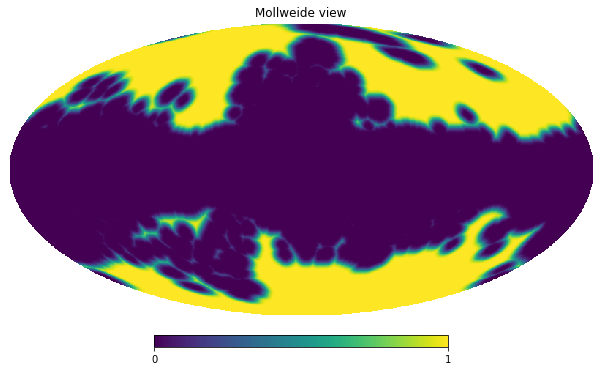

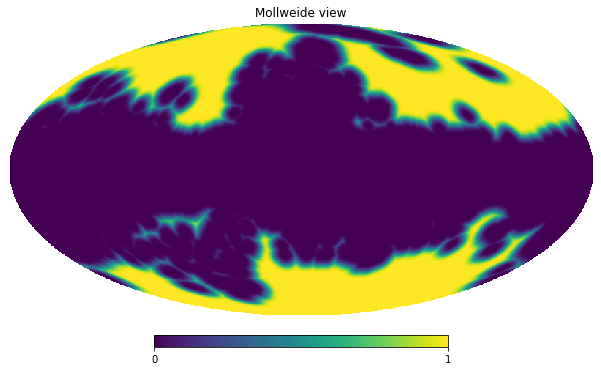

In [39]:
dnside = 512
mask_512 = hp.ud_grade(mask_binary,dnside)
for i in [8.,10.]:
    fname = f"LB_Nside{dnside}_Apo_C1_Deg_{int(i)}.fits.gz"
    mask = hp.read_map(os.path.join(Mpath,fname))
    hp.mollview(mask)